# Global GDP & Education Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Investigating Global GDP & Education

<font color=#303F9F>Investigating our first data sheet “GDP/Capita USD Inflation Adjusted” We seek to understand which countries have the highest GDP/Capita for 2017. We also rank the top 5 countries for 2017 that are above the mean. Followed by questions regarding education and GDP.

Datasets Included Are as Followed:

1.	gdppercapita_us_inflation_adjusted.csv (GDP/Capita USD Inflation Adjusted)
2.	industry_percent_of_gdp.csv (Overall percentage of GDP/Year Industry)
3.	services_percent_of_gdp.csv (Overall percentage of GDP/Year Industry)
4.	mean_years_in_school_men_15_to_24_years.csv (Mean years in school Men 15-24)
5.	mean_years_in_school_women_15_to_24_years.csv (Mean years in school Women 15-24)

Question:

<a href="#q1">1.	What are the top 5 highest GDP/Capita countries above the mean in 2017?</a>
<p>
<a href="#q2">2.	From the top 5 GDP/Capita countries in 2017, on average which countries stay in school longer? comparing  Men and Women between the ages of 15-24</a>
<p>
<a href="#q3">3.  Are these Countries predominantly a service or industrial based economy?</a>
<p>
<a href="#q4">4.	For service and industry is there an increase or decrease in these secotors?</a>
<p>
<a href="#q5">5.	Is Norway a balanced economy between its services and industrial sectors?</a></font>

<a id='wrangling'></a>
## Lets Do Some Wrangling and Oganizing.

<font color=#303F9F>We start by importing all of our necessary libraries and the data we want to analyze "gdppercapita_us_inflation_adjusted.csv".</font>
<p>
<font color=#303F9F><li>Pandas to help us wrangle and organize our data</li></font>
<font color=#303F9F><li>Matplotlib to create beautiful visualizations</li></font>
<font color=#303F9F><li>Seaborn for visualization styling</li></font>
<font color=#303F9F><li>Numpy to help with scientific computing</li></font>


In [19]:
#Import Packages and read the data

#Parts Of project
import industry_gdp
import services_gdp
import men_school
import women_school

#Wrangling and visualizing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Set Chartting Style
sns.set(style="whitegrid")

#Setting figure size for visuals
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 6

#GDP/Capita by county USD Inflation Adjusted 1970-2017 
df_gdp = pd.read_csv('gdppercapita_us_inflation_adjusted.csv')

#Viewing GDP Data
df_gdp.head()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,445.0,525.0,553,569.0,630.0,634.0,630.0,620.0,618.0,618.0
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3780.0,3930.0,4090,4210.0,4280.0,4330.0,4410.0,4520.0,4680.0,4870.0
2,Algeria,2470.0,2080.0,1630.0,2130.0,2200.0,2280.0,2110.0,2240.0,2410.0,...,4390.0,4390.0,4460,4500.0,4560.0,4600.0,4680.0,4760.0,4830.0,4830.0
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,43900.0,42000.0,39700,38200.0,38200.0,39100.0,40800.0,41800.0,43000.0,43900.0
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3580.0,3540.0,3530,3540.0,3590.0,3710.0,3750.0,3730.0,3580.0,3480.0


In [20]:
#Investigate our first data set that we will explore GDP Per Capita USD Inflation Adjusted, records for samples & columns
df_gdp.shape

(190, 59)

In [21]:
#Investigate Our Data Types GDP Per Capita US Inflation Adjusted
df_gdp.dtypes.head()

country     object
1960       float64
1961       float64
1962       float64
1963       float64
dtype: object

In [22]:
#Investigate null records GDP Per Capita US Inflation Adjusted
df_gdp.isnull().sum().head()

country      0
1960       102
1961       101
1962       101
1963       101
dtype: int64

In [23]:
#Investigate duplicate records GDP Per Capita US Inflation Adjusted
df_gdp.duplicated().sum()

0

In [24]:
#Investigate number of unique values in each column GDP Per Capita US Inflation Adjusted
df_gdp.nunique().head()

country    190
1960        84
1961        84
1962        86
1963        87
dtype: int64

In [25]:
#Generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.
df_gdp.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
count,88.000000,89.000000,89.000000,89.000000,89.000000,93.000000,96.000000,97.000000,99.000000,99.000000,...,187.000000,187.000000,190.000000,187.000000,186.000000,186.000000,186.000000,185.000000,184.000000,183.000000
mean,4622.500000,4740.325843,4883.808989,5044.146067,5298.224719,5331.537634,5355.604167,5469.247423,5769.626263,6070.545455,...,13096.508021,12494.850267,13966.078947,12787.668449,12904.198925,12987.623656,13155.446237,13380.529730,13579.402174,13861.595628
std,6259.530721,6474.995954,6668.398816,6881.558232,7284.774644,7401.639525,7497.344196,7705.354775,7986.131163,8434.129299,...,19030.226639,17930.998978,22366.413612,18167.977557,18000.075075,18028.891032,18253.648558,18648.762614,18889.869732,19122.797970
min,159.000000,141.000000,132.000000,142.000000,163.000000,176.000000,164.000000,150.000000,164.000000,166.000000,...,230.000000,230.000000,231.000000,234.000000,236.000000,239.000000,243.000000,227.000000,218.000000,213.000000
25%,711.000000,711.000000,712.000000,708.000000,698.000000,763.000000,750.750000,737.000000,757.500000,767.000000,...,1320.000000,1340.000000,1400.000000,1465.000000,1562.500000,1635.000000,1680.000000,1760.000000,1830.000000,1960.000000
50%,1485.000000,1480.000000,1490.000000,1460.000000,1550.000000,1680.000000,1685.000000,1650.000000,1690.000000,1780.000000,...,4620.000000,4550.000000,4670.000000,4940.000000,5390.000000,5615.000000,5590.000000,5660.000000,5800.000000,5810.000000
75%,5147.500000,5540.000000,5380.000000,5330.000000,5710.000000,6040.000000,5655.000000,5700.000000,6405.000000,6850.000000,...,14800.000000,13850.000000,13650.000000,13900.000000,14000.000000,14450.000000,14850.000000,14900.000000,15250.000000,15700.000000
max,27100.000000,27900.000000,27900.000000,28600.000000,30500.000000,29900.000000,30000.000000,30300.000000,31200.000000,34100.000000,...,109000.000000,102000.000000,144000.000000,105000.000000,102000.000000,104000.000000,107000.000000,108000.000000,109000.000000,108000.000000


In [26]:
#Noticing there are null values in the data we drop the null values. We can analize the max rang of data without missing data when comparing different rows
df_gdp_alldata = df_gdp.dropna()
df_gdp_alldata.tail()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
180,United Kingdom,13800.0,14100.0,14100.0,14600.0,15200.0,15600.0,15800.0,16100.0,16600.0,...,40500.0,38500.0,38900,39200.0,39500.0,40000.0,40900.0,41500.0,42000.0,42500.0
181,United States,17000.0,17100.0,17900.0,18400.0,19200.0,20200.0,21300.0,21600.0,22400.0,...,49400.0,47600.0,48400,48800.0,49500.0,50000.0,50900.0,51900.0,52300.0,53100.0
182,Uruguay,5470.0,5540.0,5380.0,5330.0,5400.0,5400.0,5500.0,5250.0,5300.0,...,10700.0,11100.0,11900,12500.0,12900.0,13500.0,13900.0,13900.0,14000.0,14400.0
188,Zambia,1510.0,1480.0,1400.0,1400.0,1520.0,1720.0,1580.0,1650.0,1620.0,...,1290.0,1370.0,1460,1500.0,1570.0,1600.0,1620.0,1620.0,1630.0,1650.0
189,Zimbabwe,898.0,924.0,907.0,932.0,893.0,907.0,891.0,936.0,925.0,...,593.0,652.0,720,814.0,914.0,942.0,940.0,934.0,918.0,927.0


<font color=#303F9F>We run into a problem with year being in the header. This makes it difficult to work with the data set. Luckily there is a function called “MELT” in the pandas library that will place all dates within a new column.</font>

In [27]:
#using padas melt function to organize and relable the data. The year being in the header to the year being a column.
gdp_cleaner = pd.melt(df_gdp_alldata, id_vars=['country'],var_name='year', value_name='gdp')
gdp_cleaner.head()

,country,year,gdp
0,Algeria,1960,2470.0
1,Argentina,1960,5610.0
2,Australia,1960,19400.0
3,Austria,1960,13000.0
4,Bahamas,1960,17700.0


In [28]:
#Exploring the data again once it's cleaned
gdp_cleaner.describe()

,gdp
count,5046.000000
mean,10074.907848
std,15632.132390
min,116.000000
25%,940.000000
50%,2685.000000
75%,11100.000000
max,112000.000000


<a id='eda'></a>
## Exploratory Data Analysis

<a id='q1'></a>
## Question 1:

<font color=#303F9F>What countries rank highest in GDP above the global average for 2017?</font>

In [29]:
#Find GDP for countries for the year 2017 and describe
gdp_year_2017 = gdp_cleaner[gdp_cleaner['year'].str.contains("2017")]
gdp_year_2017.describe()

,gdp
count,87.000000
mean,15571.770115
std,21986.965669
min,213.000000
25%,1490.000000
50%,5270.000000
75%,19200.000000
max,108000.000000


In [30]:
#query to build list of countries with above mean GDP for 2017
gdp_above_avg_2017 = gdp_year_2017[gdp_year_2017['gdp'] >= 15571.770115]
highest_gdp_avg_2017 = gdp_year_2017.sort_values(by=['gdp'], ascending=False)
highest_gdp_avg_2017.head()

,country,year,gdp
5006,Luxembourg,2017,108000.0
5018,Norway,2017,91200.0
4984,Denmark,2017,61600.0
5036,Sweden,2017,56900.0
4961,Australia,2017,55900.0


In [31]:
#Higest GDP above global Mean top 5
lu = gdp_cleaner[gdp_cleaner['country'].str.contains("Luxembourg")]
no = gdp_cleaner[gdp_cleaner['country'].str.contains("Norway")]
dk = gdp_cleaner[gdp_cleaner['country'].str.contains("Denmark")]
se = gdp_cleaner[gdp_cleaner['country'].str.contains("Sweden")]
au = gdp_cleaner[gdp_cleaner['country'].str.contains("Australia")]

<font color=#303F9F>Deciding to use a line chart to plot our data we can measure our data points for each year over the time span the data was collected. This is a great way to observe the data changes over time.</font>

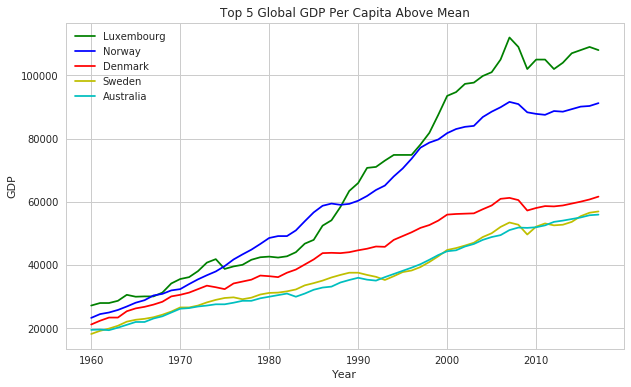

In [32]:
#Plotting Top 5 Countries Above the Mean GDP/Capita 2017
def high_gdp_line_chart():
    
    sns.set(style="whitegrid")
    year = list(range(1960, 2018))
    lu_gdp = lu['gdp']
    no_gdp = no['gdp']
    dk_gdp = dk['gdp']
    se_gdp = se['gdp']
    au_gdp = au['gdp']

    plt.plot(year, lu_gdp, color='g', label='Luxembourg')
    plt.plot(year, no_gdp, color='b', label='Norway')
    plt.plot(year, dk_gdp, color='r', label='Denmark')
    plt.plot(year, se_gdp, color='y', label='Sweden')
    plt.plot(year, au_gdp, color='c', label='Australia')

    plt.legend(loc='upper left')
    plt.xlabel('Year')
    plt.ylabel('GDP')
    plt.title('Top 5 Global GDP Per Capita Above Mean')
    return plt.show()

high_gdp_line_chart()

## Question 1:

<font color=#303F9F>What countries rank highest in GDP above the global average for 2017?</font> <a id='eda'></a>

<font color=#303F9F>We can also represent this as a pie chart to visualize our sample groups rank for GDP in 2017 (Top 5)</font>

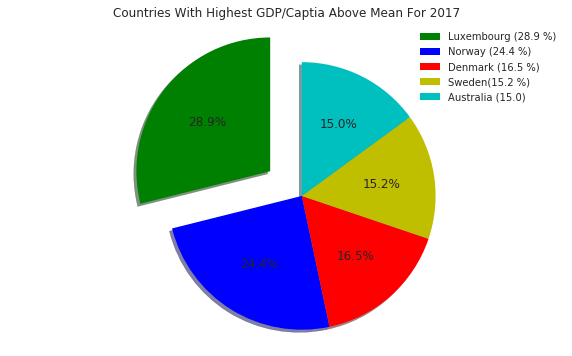

In [33]:
#Plotting a pie chart for top 5 countries above the mean GDP/Capita 2017
def high_gdp_pie():

    lux_pie = highest_gdp_avg_2017.iloc[0,2]
    no_pie = highest_gdp_avg_2017.iloc[1,2]
    dk_pie = highest_gdp_avg_2017.iloc[2,2]
    se_pie = highest_gdp_avg_2017.iloc[3,2]
    au_pie = highest_gdp_avg_2017.iloc[4,2]
    
    percent = lux_pie+no_pie+dk_pie+se_pie+au_pie

    pp1 = lux_pie/percent*100
    pp2 = no_pie/percent*100
    pp3 = dk_pie/percent*100
    pp4 = se_pie/percent*100
    pp5 = au_pie/percent*100

    labels = [r'Luxembourg (28.9 %)', r'Norway (24.4 %)',r'Denmark (16.5 %)', r'Sweden(15.2 %)',r'Australia (15.0)']
    sizes = [pp1,pp2,pp3,pp4,pp5]
    colors = ['g', 'b', 'r', 'y', 'c']
    explode = (0.3,0,0,0,0)  # only "explode" the 1st slice (i.e. 'Okay')

    plt.pie(sizes, explode=explode, colors=colors,
            autopct='%1.1f%%', shadow=True, startangle=90)
    # Set aspect ratio to be equal so that pie is drawn as a circle & Title.
    plt.title("Countries With Highest GDP/Captia Above Mean For 2017")
    plt.legend(labels, loc="upper right")
    plt.axis('equal')
    return plt.show()

high_gdp_pie()

## Observation Question 1: 

<font color=#303F9F>Luxembourg ranks 1st followed by Norway, Denmark, Sweden and Australia.</font>

<a id='q2'></a>
## Question 2:
<font color=#303F9F>From the top 5 GDP/Capita countries in 2017, on average which countries stay in school longer? Comparing  Men and Women between the ages of 15-24 </font> <a id='eda'></a>

<font color=#303F9F>Deciding to use a line chart to plot our data we can measure our data points for each year over the time span the data was collected. This is a great way to observe the data changes over time.</font>

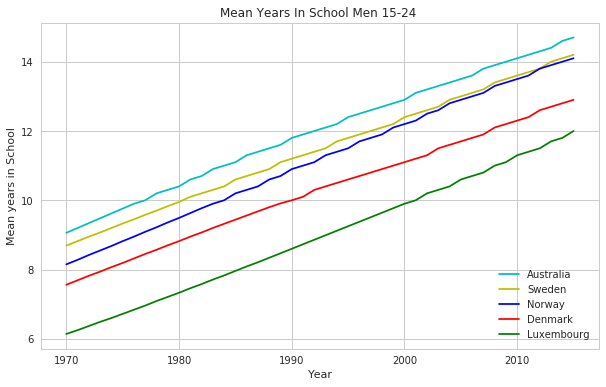

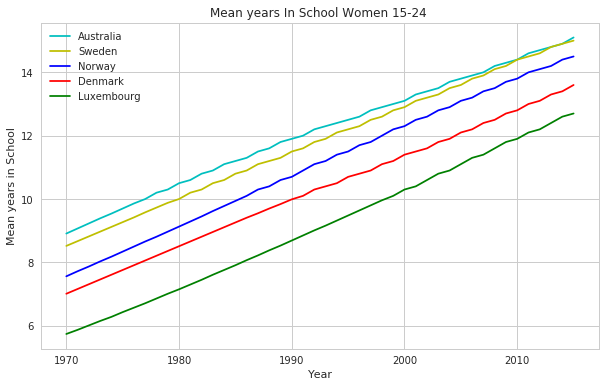

In [34]:
#Calling functions we have created to address Our question
men_school.top_gdp_mschool()
women_school.top_gdp_wschool()

## Observation Question 2: 

<font color=#303F9F>It looks as though each country is experiencing a steady growth in education. However, Australian men and women are staying in school longer, yet they rank last of the top 5 (GDP above the global average for 2017). There are a few outliers in this observation however the strongest is Luxembourg. It would appear that the length of time men and women spend in school has nothing to do with the strength of its GDP, compared to the other samples.</font>

<a id='q3'></a>
## Question 3:
<font color=#303F9F>Are these Countries predominantly a service or industrial based economy?</font> <a id='eda'></a>

<font color=#303F9F>Deciding to use a line chart to plot our data we can measure our data points for each year over the time span the data was collected. This is a great way to observe the data changes over time.</font>

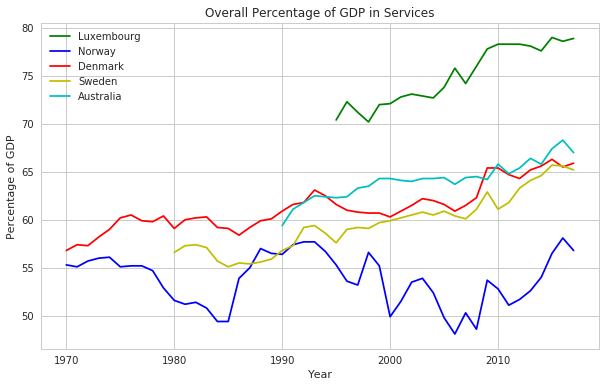

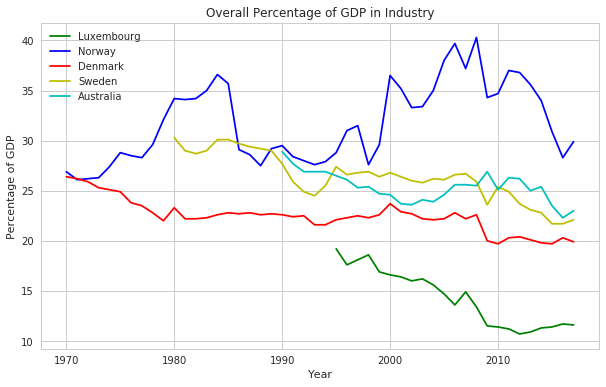

In [35]:
#Calling functions we have created to address our question
services_gdp.gdp_services_line_chart()
industry_gdp.gdp_industry_line_chart()

## Observation 3:

<font color=#303F9F>All five countries are majority service based economies. The true outlier is Norway, which remains mostly a services based economy. However it has the strongest industrial based sector of our 5 samples. Norway appears to have a fairly balanced industrial and service sector.</font>

<a id='q4'></a>
## Question 4:
<font color=#303F9F>For service and industry is there an increase or decrease in these secotors?</font>
## Observation 4:

<font color=#303F9F>There is an increase for the services sector of the economy for each of the five sample. All five samples excluding Norway are decreasing in their industrial based sectors.</font>

<a id='q5'></a>
## Question 5:

<font color=#303F9F>Is Norway a balanced economy between its services and industrial sectors?</font>


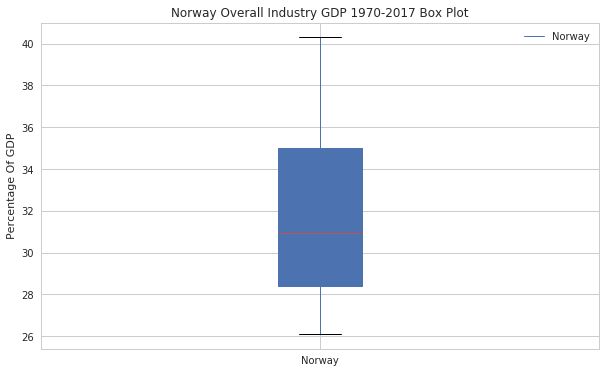

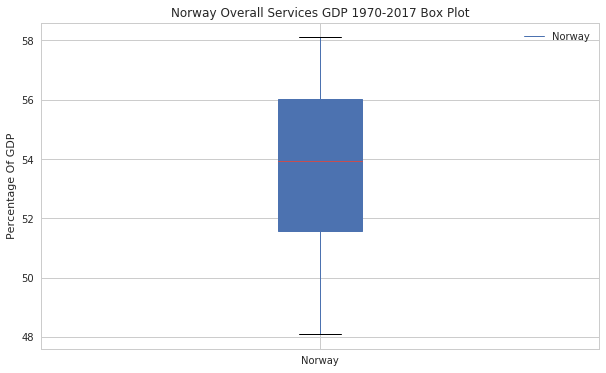

In [36]:
#Calling functions (box plots) we have created to address our question
industry_gdp.gdp_percent_industry_norway_box();
services_gdp.gdp_percent_services_norway_box();

## Observation 5:

<font color=#303F9F>According to the box plots for percentage of GDP in each sector. We can see that the industrial sector is skewed heavily between 31-40% meaning that within the time period of 1970-2017 they must have had a few periods of boom and bust cycles. This is normal for the industrial sector or any economy. However if we look to the services box plot we will notice it remains relatively balanced compared to industrial.</font>  



<a id='conclusions'></a>
## Conclusion

	
Results: Our data suggests that
1.	Luxembourg ranks 1st followed by Norway, Denmark, Sweden and Australia in global GDP/Capita for 2017.
2.	It looks as though each country is experiencing a steady growth in education. However, Australian men and women are staying in school longer, yet they rank last of the top 5 (GDP above the global average for 2017). There are a few outliers in this observation however the strongest is Luxembourg. It would appear that the length of time men and women spend in school has nothing to do with the strength of its GDP, compared to the other samples.
3.	All five countries are majority service based economies. The true outlier is Norway, which remains mostly a services based economy. However it has the strongest industrial based sector of our 5 samples. Norway appears to have a fairly balanced industrial and service sector.
4.	There is an increase for the services sector of the economy for each of the five sample. All five samples excluding Norway are decreasing in their industrial based sectors. 
5.	According to the box plots for percentage of GDP in each sector. We can see that the industrial sector is skewed heavily between 31-40% meaning that within the time period of 1970-2017 they must have had a few periods of boom and bust cycles. This is normal for the industrial sector or any economy. However if we look to the services box plot we will notice it remains relatively balanced compared to industrial.  



<font color=#303F9F>Limitations: Limiting factors
    <p>
	After observing the data and charting our finding we notice it leads to more questions. We have answered some of the basics however there is more to explore. The overall findings suggest that Norway is relatively balanced in education and economy in both services and industry sectors. We could gather more societal data and see how it compares with our other 5 samples. We could use it to develop more indicators. Through the insight that we have gathered we can look to find better ways to improve the economy and society overall. I believe this to be the greatest lesson of this exercise.</font>
